## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Apr 29 10:47:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 165MB/s]
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 75.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 186.5ms
Speed: 11.7ms preprocess, 186.5ms inference, 3256.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


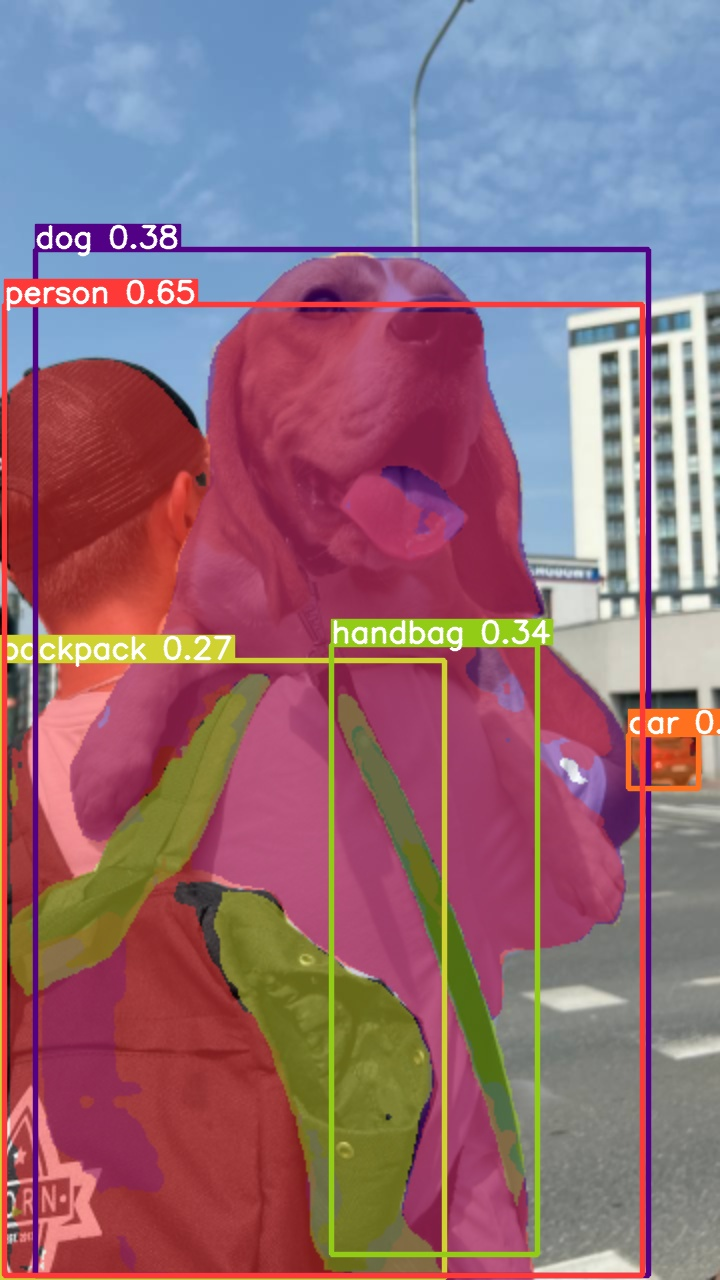

In [6]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 141.2ms
Speed: 2.1ms preprocess, 141.2ms inference, 2366.9ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [17]:
results[0].masks.shape

torch.Size([5, 640, 384])

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
ROOT_PATH = "/content/drive/MyDrive/Shared_With329/object-segmatation-YOLOv8"

In [20]:
!pwd

/content


In [22]:
%cd "/content/drive/MyDrive/Shared_With329/object-segmatation-YOLOv8"

/content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-segmatation-YOLOv8


In [23]:
!pwd

/content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-segmatation-YOLOv8


In [24]:
!ls

bubble_data  data.yaml	yolov8_instance_segmentation_on_custom_dataset.ipynb


## Custom Training

In [25]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=100 imgsz=544 save=true

100% 22.8M/22.8M [00:00<00:00, 133MB/s] 
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=544, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

In [26]:
!ls runs/segment/train/

args.yaml					    labels.jpg		 train_batch1441.jpg
BoxF1_curve.png					    MaskF1_curve.png	 train_batch1442.jpg
BoxP_curve.png					    MaskP_curve.png	 train_batch1.jpg
BoxPR_curve.png					    MaskPR_curve.png	 train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1714388774.155065b429f5.5951.0  train_batch0.jpg	 val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1440.jpg  weights


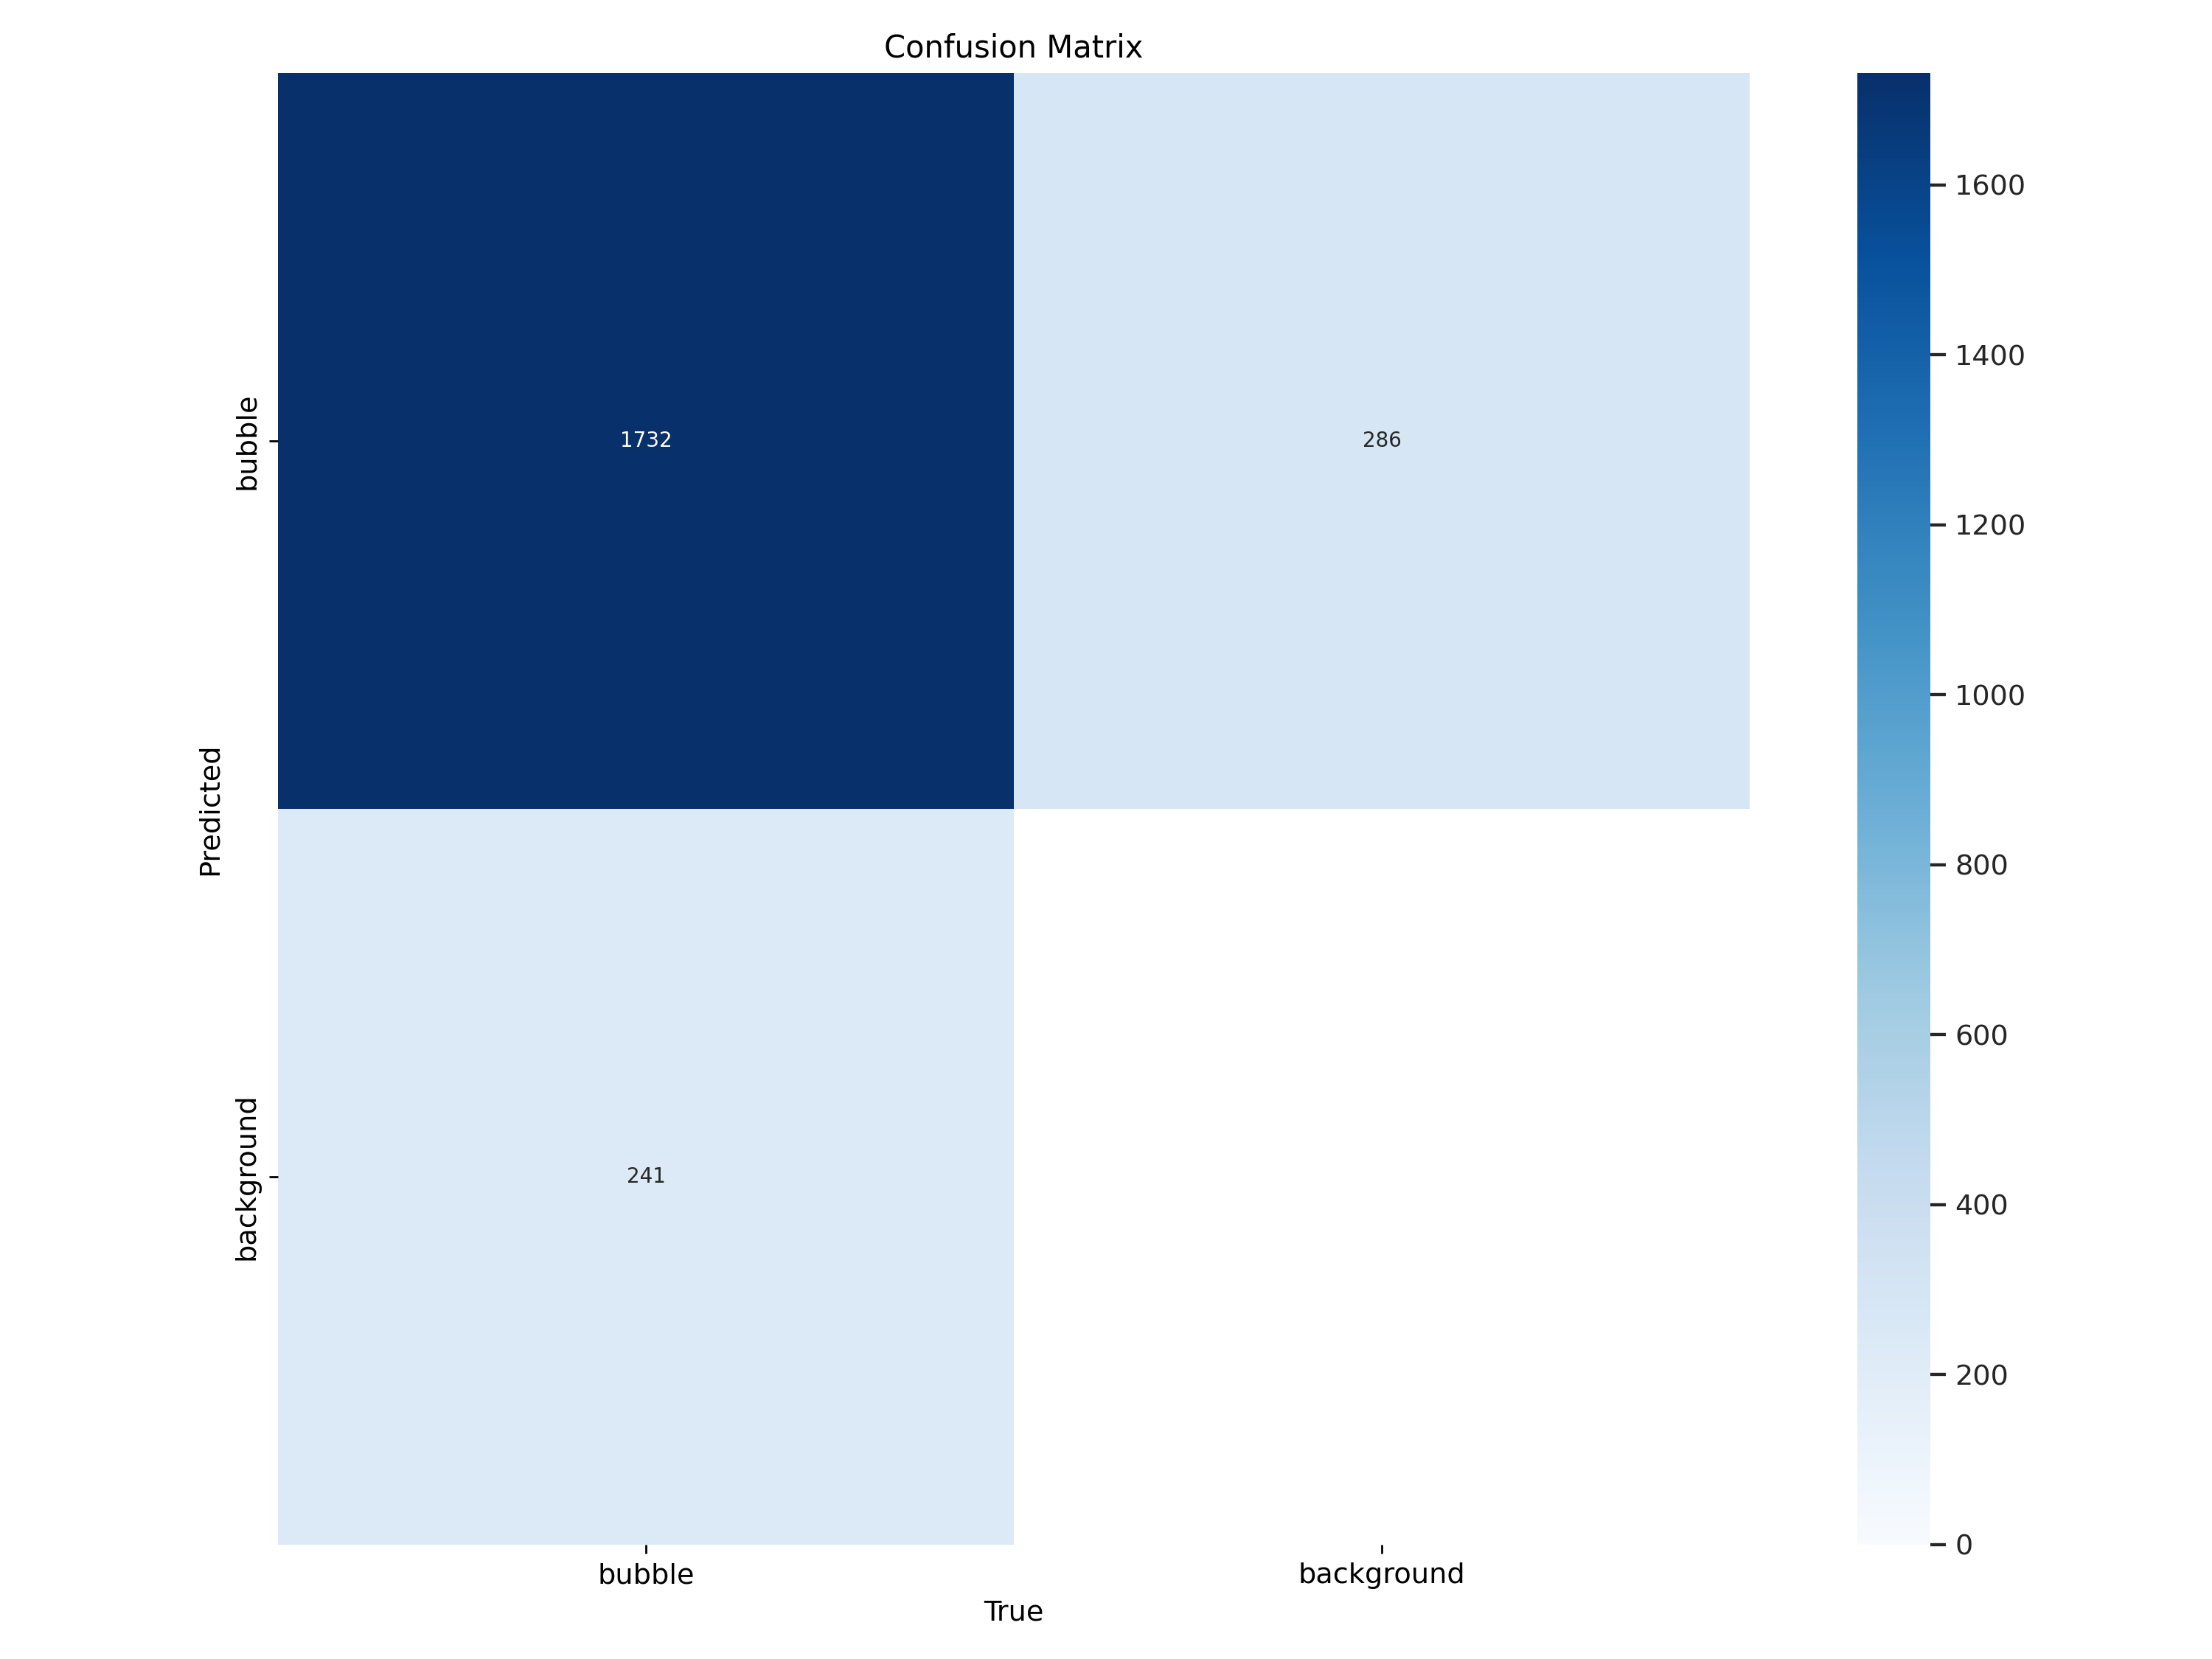

In [27]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

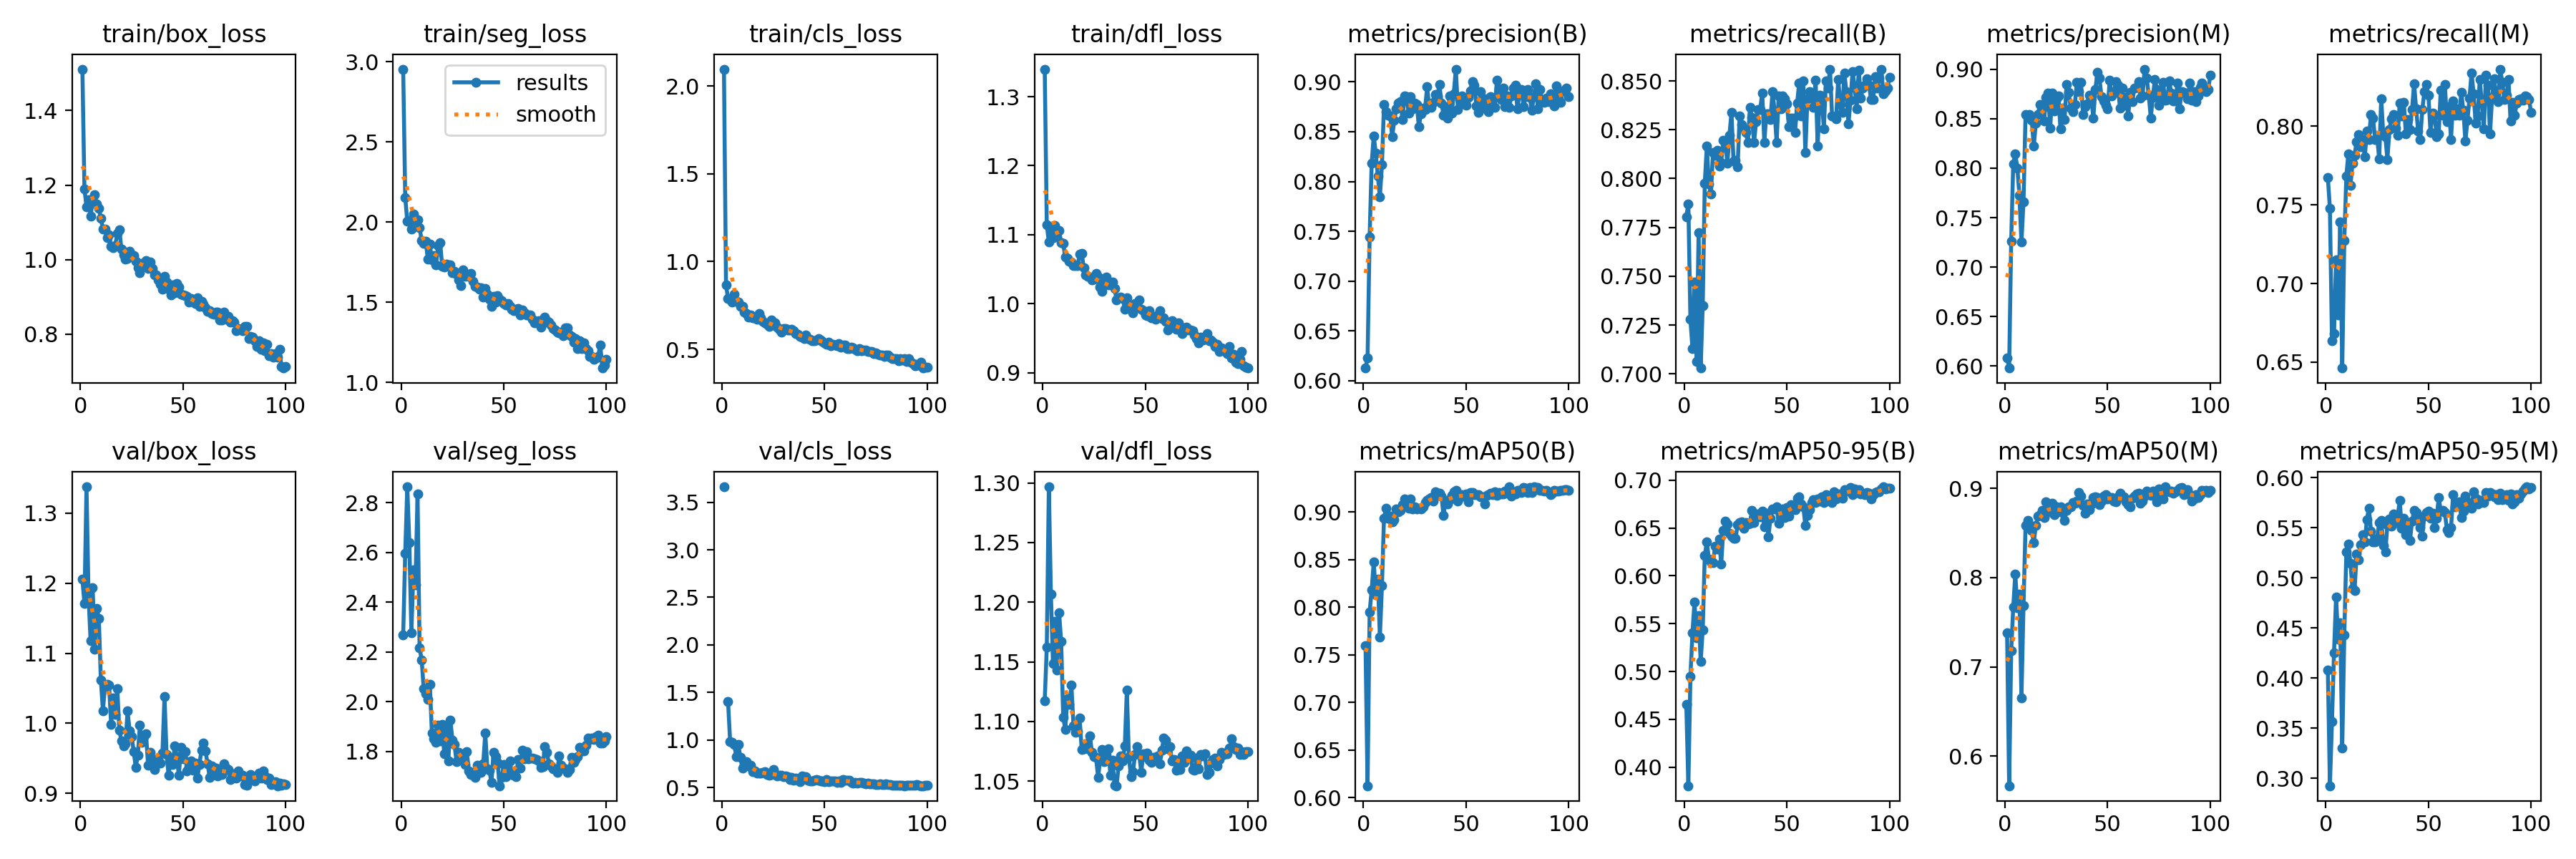

In [28]:
Image(filename=f'runs/segment/train/results.png', width=600)

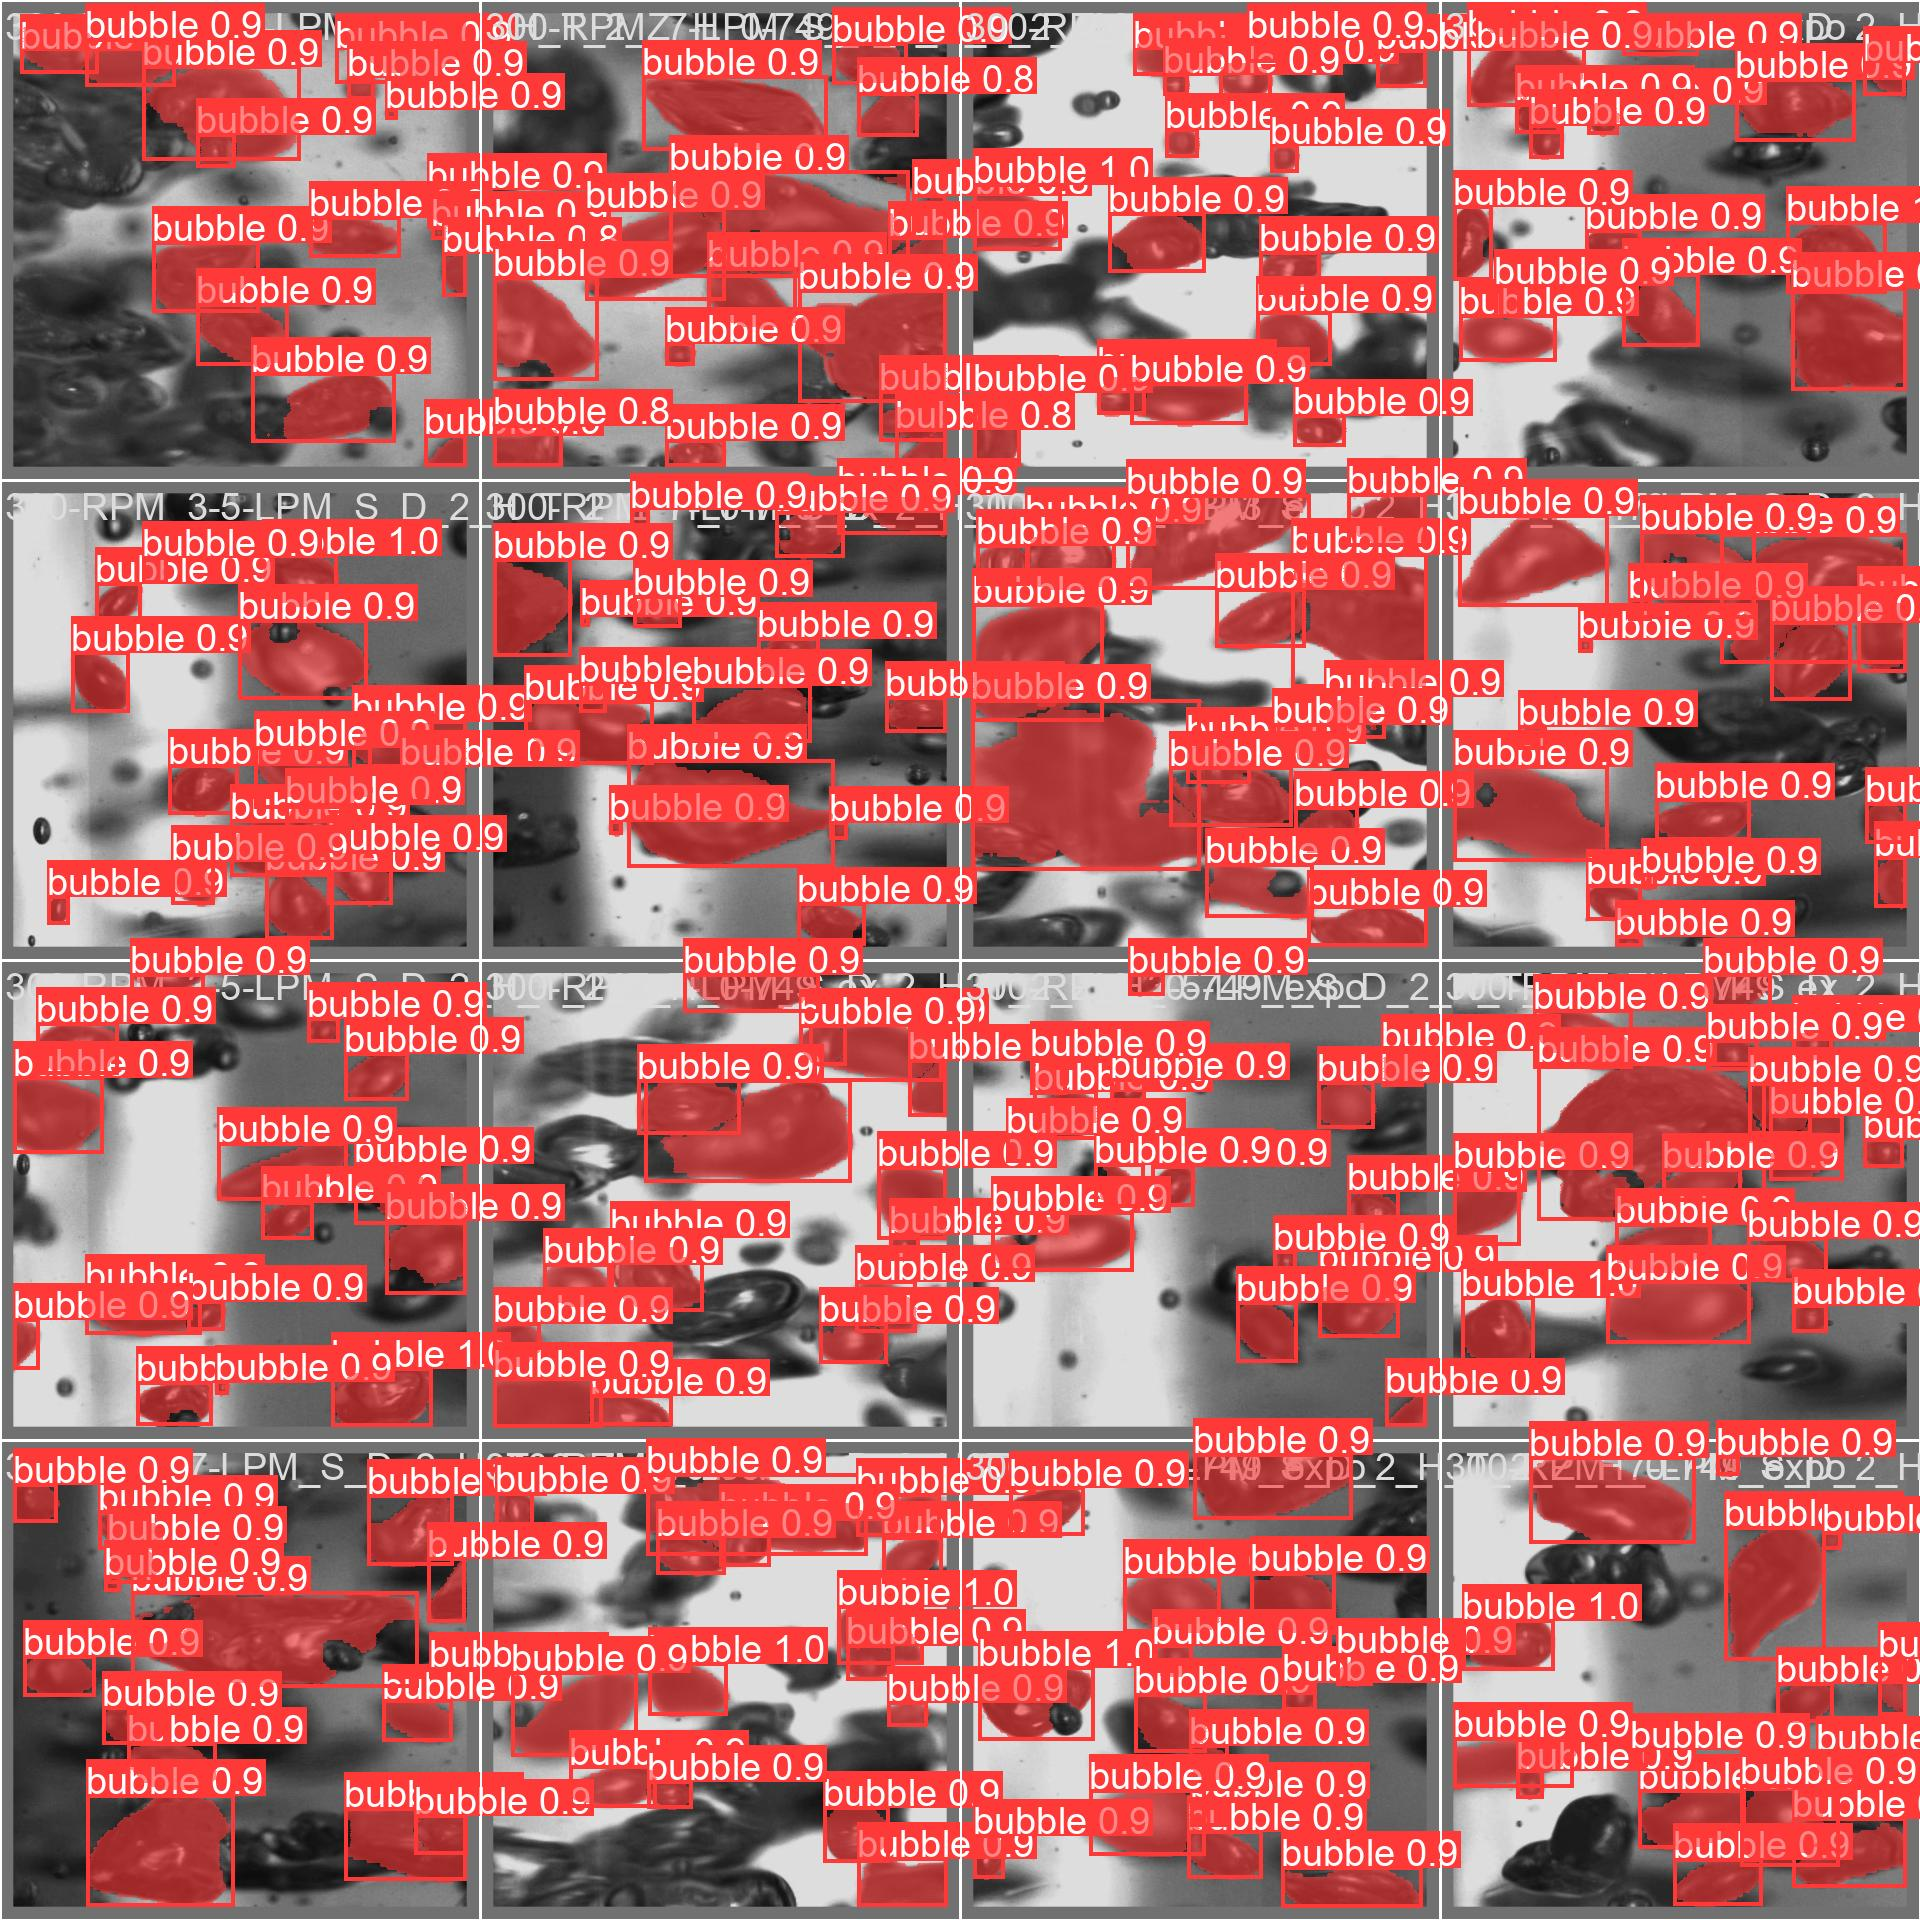

In [29]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [30]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-segmatation-YOLOv8/bubble_data/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100% 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:09<00:00,  3.01s/it]
                   all         47       1973      0.891      0.844      0.923      0.693      0.879      0.816      0.893      0.582
Speed: 3.8ms preprocess, 32.5ms inference, 0.0ms loss, 55.6ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [34]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=bubble_data/test/images save=true

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/32 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-segmatation-YOLOv8/bubble_data/test/images/300-RPM_10-5-LPM_S_D_2_H_T_2_Z_H_0-333_exposure-750-us_2565_jpg.rf.a3ffc0fc6306cd0a698f6af9673f0134.jpg: 544x544 52 bubbles, 18.3ms
image 2/32 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-segmatation-YOLOv8/bubble_data/test/images/300-RPM_10-5-LPM_S_D_2_H_T_2_Z_H_0-333_exposure-750-us_2733_jpg.rf.f7f9171fe6cc0dac164150b9173fd1b0.jpg: 544x544 56 bubbles, 18.3ms
image 3/32 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-segmatation-YOLOv8/bubble_data/test/images/300-RPM_3-5-LPM_S_D_2_H_T_2_Z_H_0-333_exposure-750-us-1_2520_jpg.rf.f46e25b924f823ba428fde1b22ddd36c.jpg: 544x544 5

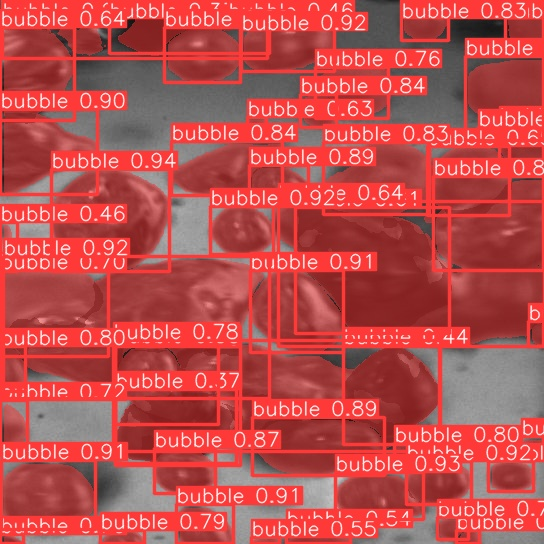

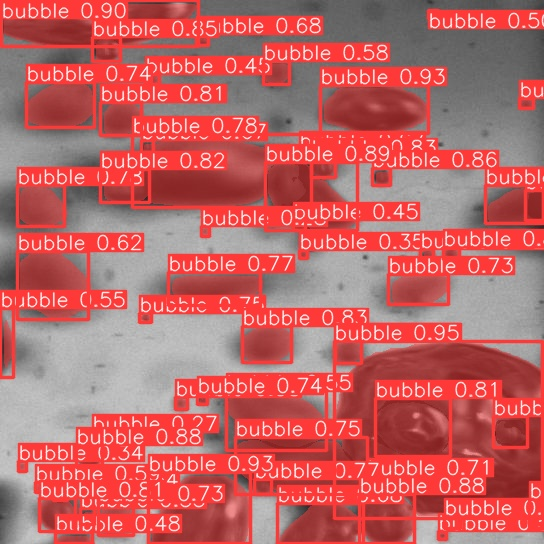

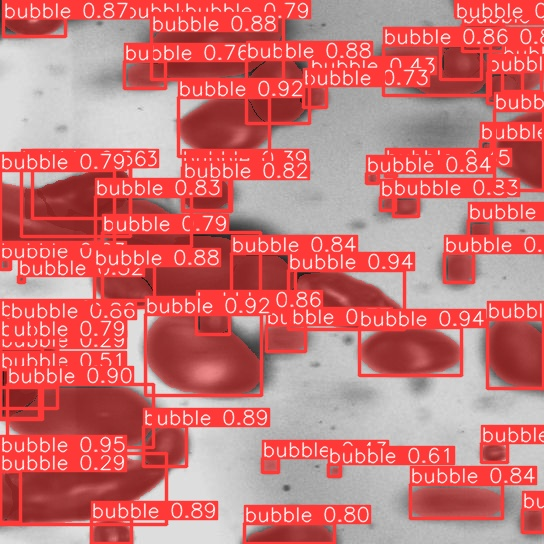

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 🏆 Congratulations


### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

